<a href="https://colab.research.google.com/github/aminbuet/Deep_Learning_Projects/blob/master/deep_learning_decision_boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

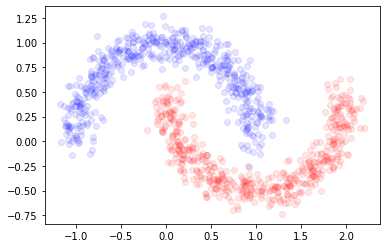

In [0]:
X,y = make_moons(n_samples=1000, noise=0.1, random_state=0)

plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.1)
plt.plot(X[y==1, 0], X[y==1, 1], 'or', alpha=0.1)
plt.show()

In [0]:
X.shape

(1000, 2)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [0]:
# Shallow deep learning by passed in one layer

import tensorflow as tf
import keras

model = tf.keras.models.Sequential([
                                   tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid')
])

model.compile(tf.keras.optimizers.Adam(lr=0.5), "binary_crossentropy", metrics=['accuracy'])

In [0]:
model.fit(X, y, epochs=200, verbose=0)

In [0]:
results = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 13ms/step - loss: 0.3075 - accuracy: 0.8433


In [0]:
results

[0.30745357275009155, 0.8433333039283752]

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


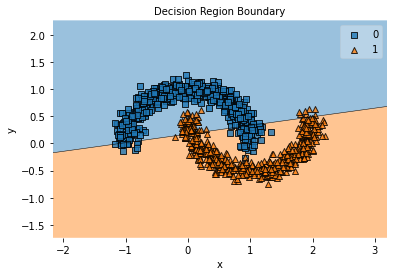

In [0]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X, y=y, clf=model, legend=1)
plt.xlabel('x', size=10)
plt.ylabel('y', size=10)
plt.title('Decision Region Boundary',size=10)
plt.show()

In [0]:
# More layer means more depth

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(4, input_shape=(2,), activation='tanh'))
model.add(tf.keras.layers.Dense(2, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(tf.keras.optimizers.Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=300, verbose=0)


In [0]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 0.9967


[0.006362746469676495, 0.996666669845581]

In [0]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print ('Train set accuracy: \t{:0.3f}'.format(accuracy_score(y_train, y_train_pred)))
print ('Test set accuracy: \t{:0.3f}'.format(accuracy_score(y_test, y_test_pred)))

Train set accuracy: 	0.999
Test set accuracy: 	0.997


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


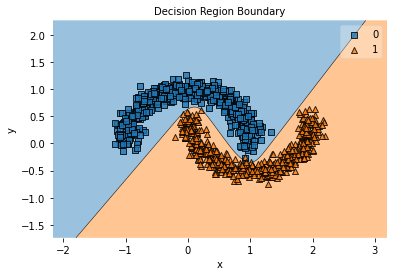

In [0]:
plot_decision_regions(X=X, y=y, clf=model, legend=1)
plt.xlabel('x', size=10)
plt.ylabel('y', size=10)
plt.title('Decision Region Boundary',size=10)
plt.show()